# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.
* There is no strong relationship between latitude and humidity. 



The majority of the cities generated are in the Northern hemisphere.
---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import json
import seaborn as sns
import pycountry 
from datetime import datetime 



# Import API key
from api_keys import api_key 


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy 

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

In [3]:

# DataFrame based on cities latitude and Longitude 

cities_df = pd.DataFrame ({"Latitude": lats, "Longitude": lngs})
cities_df.head()

,Latitude,Longitude
0,-32.102887,143.480552
1,-1.582143,128.733540
2,51.698735,-108.614139
3,-59.537382,-123.625078
4,-73.941045,-141.451481


In [4]:
# Create new columns in data frame for city and country 
cities_df["City"] = ""
cities_df["Country"] = ""


# Use citipy to find the nearest city to given random coords and write into the DF
for index, row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_df.set_value(index, "City", city.city_name)
    cities_df.set_value(index, "Country", city.country_code)
    

# Remove duplicate cities
cities_df = cities_df.drop_duplicates(["City"], keep='first')


cities_df.count()

/Users/lucianaroberts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/lucianaroberts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


Latitude     636
Longitude    636
City         636
Country      636
dtype: int64

In [5]:

# Build the API URL
# Import API key
from api_keys import api_key 
url = "http://api.openweathermap.org/data/2.5/weather?q="

cities_df["Temp"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Cloud"] = ""
cities_df["Wind"] = ""
date = ["dt"] 

SleepCounter = 0
PullCounter = 0
BatchCounter = 1

# Loop through the APIs to construct new columns in data frame 
for index, row in cities_df.iterrows():
    try:
        query = url + row["City"].replace(" ","+") + row["Date"].replace(" ","+") + "," + row["Country"] + "&appid=" + api_key + "&units=imperial"
        get = req.get(query)
        getJ = get.json()
        
        cities_df.set_value(index, "Temp", getJ["main"]["temp"])
        cities_df.set_value(index, "Date", getJ["dt"]) 
        cities_df.set_value(index, "Humidity", getJ["main"]["humidity"])
        cities_df.set_value(index, "Cloud", getJ["clouds"]["all"])
        cities_df.set_value(index, "Wind", getJ["wind"]["speed"])
    except:
        cities_df.set_value(index, "Temp", "FAIL")
    
    PullCounter += 1
    
    SleepCounter += 1
    
    # If loop to ensure not overloading the weather API
    if SleepCounter == 40:
        print("~~~ Break Time ~~~")
        time.sleep(10)
        print("")
        SleepCounter = 0
        BatchCounter += 1
    
    # Printing API link
    print("=====================")
    print("Processing Record " + str(PullCounter) + " of Set " + str(BatchCounter) +" City: " + row["City"])
    print(query)

              
   

/Users/lucianaroberts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/lucianaroberts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/lucianaroberts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/lucianaroberts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/lucianaroberts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future

Processing Record 1 of Set 1 City: broken hill
http://api.openweathermap.org/data/2.5/weather?q=broken+hill,au&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 2 of Set 1 City: amahai
http://api.openweathermap.org/data/2.5/weather?q=amahai,id&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 3 of Set 1 City: kerrobert
http://api.openweathermap.org/data/2.5/weather?q=kerrobert,ca&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 4 of Set 1 City: rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial


/Users/lucianaroberts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Processing Record 5 of Set 1 City: mataura
http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 6 of Set 1 City: polikhnitos
http://api.openweathermap.org/data/2.5/weather?q=polikhnitos,gr&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 7 of Set 1 City: upernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 8 of Set 1 City: cape town
http://api.openweathermap.org/data/2.5/weather?q=cape+town,za&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 9 of Set 1 City: nome
http://api.openweathermap.org/data/2.5/weather?q=nome,us&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 10 of Set 1 City: tuatapere
http://api.openweathermap.org/data/2.5/weather?q=tuatapere,nz&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 11 of Set 1 City: martapu

Processing Record 51 of Set 2 City: freeport
http://api.openweathermap.org/data/2.5/weather?q=freeport,us&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 52 of Set 2 City: ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 53 of Set 2 City: pampierstad
http://api.openweathermap.org/data/2.5/weather?q=pampierstad,za&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 54 of Set 2 City: labuhan
http://api.openweathermap.org/data/2.5/weather?q=labuhan,id&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 55 of Set 2 City: illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut,gl&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 56 of Set 2 City: grimari
http://api.openweathermap.org/data/2.5/weather?q=grimari,cf&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 57 of 

Processing Record 97 of Set 3 City: hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 98 of Set 3 City: petawawa
http://api.openweathermap.org/data/2.5/weather?q=petawawa,ca&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 99 of Set 3 City: kaitangata
http://api.openweathermap.org/data/2.5/weather?q=kaitangata,nz&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 100 of Set 3 City: new norfolk
http://api.openweathermap.org/data/2.5/weather?q=new+norfolk,au&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 101 of Set 3 City: sawakin
http://api.openweathermap.org/data/2.5/weather?q=sawakin,sd&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 102 of Set 3 City: bose
http://api.openweathermap.org/data/2.5/weather?q=bose,cn&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 103 of Set 3 City: 

Processing Record 142 of Set 4 City: mbini
http://api.openweathermap.org/data/2.5/weather?q=mbini,gq&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 143 of Set 4 City: tabas
http://api.openweathermap.org/data/2.5/weather?q=tabas,ir&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 144 of Set 4 City: mogzon
http://api.openweathermap.org/data/2.5/weather?q=mogzon,ru&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 145 of Set 4 City: gornopravdinsk
http://api.openweathermap.org/data/2.5/weather?q=gornopravdinsk,ru&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 146 of Set 4 City: victoria
http://api.openweathermap.org/data/2.5/weather?q=victoria,sc&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 147 of Set 4 City: zyryanka
http://api.openweathermap.org/data/2.5/weather?q=zyryanka,ru&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 148 of Set 4 City: y

Processing Record 188 of Set 5 City: aporawan
http://api.openweathermap.org/data/2.5/weather?q=aporawan,ph&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 189 of Set 5 City: burica
http://api.openweathermap.org/data/2.5/weather?q=burica,pa&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 190 of Set 5 City: kayes
http://api.openweathermap.org/data/2.5/weather?q=kayes,ml&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 191 of Set 5 City: nanortalik
http://api.openweathermap.org/data/2.5/weather?q=nanortalik,gl&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 192 of Set 5 City: caravelas
http://api.openweathermap.org/data/2.5/weather?q=caravelas,br&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 193 of Set 5 City: saint-joseph
http://api.openweathermap.org/data/2.5/weather?q=saint-joseph,re&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 194 of Set 5

Processing Record 233 of Set 6 City: shaowu
http://api.openweathermap.org/data/2.5/weather?q=shaowu,cn&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 234 of Set 6 City: kavieng
http://api.openweathermap.org/data/2.5/weather?q=kavieng,pg&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 235 of Set 6 City: hereford
http://api.openweathermap.org/data/2.5/weather?q=hereford,us&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 236 of Set 6 City: zhigansk
http://api.openweathermap.org/data/2.5/weather?q=zhigansk,ru&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 237 of Set 6 City: payson
http://api.openweathermap.org/data/2.5/weather?q=payson,us&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 238 of Set 6 City: deputatskiy
http://api.openweathermap.org/data/2.5/weather?q=deputatskiy,ru&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 239 of Set 6 City: p

Processing Record 279 of Set 7 City: faanui
http://api.openweathermap.org/data/2.5/weather?q=faanui,pf&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
~~~ Break Time ~~~

Processing Record 280 of Set 8 City: longyearbyen
http://api.openweathermap.org/data/2.5/weather?q=longyearbyen,sj&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 281 of Set 8 City: okato
http://api.openweathermap.org/data/2.5/weather?q=okato,nz&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 282 of Set 8 City: am timan
http://api.openweathermap.org/data/2.5/weather?q=am+timan,td&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 283 of Set 8 City: knysna
http://api.openweathermap.org/data/2.5/weather?q=knysna,za&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 284 of Set 8 City: ciudad guayana
http://api.openweathermap.org/data/2.5/weather?q=ciudad+guayana,ve&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processi

Processing Record 324 of Set 9 City: griffith
http://api.openweathermap.org/data/2.5/weather?q=griffith,au&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 325 of Set 9 City: lesozavodsk
http://api.openweathermap.org/data/2.5/weather?q=lesozavodsk,ru&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 326 of Set 9 City: lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?q=lazaro+cardenas,mx&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 327 of Set 9 City: acarau
http://api.openweathermap.org/data/2.5/weather?q=acarau,br&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 328 of Set 9 City: rawson
http://api.openweathermap.org/data/2.5/weather?q=rawson,ar&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 329 of Set 9 City: saint-philippe
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing

Processing Record 370 of Set 10 City: kahului
http://api.openweathermap.org/data/2.5/weather?q=kahului,us&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 371 of Set 10 City: nyurba
http://api.openweathermap.org/data/2.5/weather?q=nyurba,ru&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 372 of Set 10 City: salawagan
http://api.openweathermap.org/data/2.5/weather?q=salawagan,ph&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 373 of Set 10 City: mount isa
http://api.openweathermap.org/data/2.5/weather?q=mount+isa,au&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 374 of Set 10 City: tomelloso
http://api.openweathermap.org/data/2.5/weather?q=tomelloso,es&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 375 of Set 10 City: kieta
http://api.openweathermap.org/data/2.5/weather?q=kieta,pg&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 376 of Set 10 Ci

Processing Record 415 of Set 11 City: ayagoz
http://api.openweathermap.org/data/2.5/weather?q=ayagoz,kz&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 416 of Set 11 City: lisakovsk
http://api.openweathermap.org/data/2.5/weather?q=lisakovsk,kz&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 417 of Set 11 City: jaisalmer
http://api.openweathermap.org/data/2.5/weather?q=jaisalmer,in&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 418 of Set 11 City: trogir
http://api.openweathermap.org/data/2.5/weather?q=trogir,hr&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 419 of Set 11 City: sorland
http://api.openweathermap.org/data/2.5/weather?q=sorland,no&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 420 of Set 11 City: urcos
http://api.openweathermap.org/data/2.5/weather?q=urcos,pe&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 421 of Set 11 City: hu

Processing Record 460 of Set 12 City: anadyr
http://api.openweathermap.org/data/2.5/weather?q=anadyr,ru&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 461 of Set 12 City: teknaf
http://api.openweathermap.org/data/2.5/weather?q=teknaf,bd&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 462 of Set 12 City: kenora
http://api.openweathermap.org/data/2.5/weather?q=kenora,ca&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 463 of Set 12 City: cockburn town
http://api.openweathermap.org/data/2.5/weather?q=cockburn+town,tc&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 464 of Set 12 City: rio grande
http://api.openweathermap.org/data/2.5/weather?q=rio+grande,br&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 465 of Set 12 City: rio cuarto
http://api.openweathermap.org/data/2.5/weather?q=rio+cuarto,ar&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 466 

Processing Record 505 of Set 13 City: visnes
http://api.openweathermap.org/data/2.5/weather?q=visnes,no&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 506 of Set 13 City: ankara
http://api.openweathermap.org/data/2.5/weather?q=ankara,tr&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 507 of Set 13 City: gallup
http://api.openweathermap.org/data/2.5/weather?q=gallup,us&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 508 of Set 13 City: cabo san lucas
http://api.openweathermap.org/data/2.5/weather?q=cabo+san+lucas,mx&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 509 of Set 13 City: apolda
http://api.openweathermap.org/data/2.5/weather?q=apolda,de&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 510 of Set 13 City: tula
http://api.openweathermap.org/data/2.5/weather?q=tula,mx&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 511 of Set 13 City: yu

Processing Record 550 of Set 14 City: tingi
http://api.openweathermap.org/data/2.5/weather?q=tingi,tz&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 551 of Set 14 City: santa helena
http://api.openweathermap.org/data/2.5/weather?q=santa+helena,br&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 552 of Set 14 City: batie
http://api.openweathermap.org/data/2.5/weather?q=batie,bf&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 553 of Set 14 City: broome
http://api.openweathermap.org/data/2.5/weather?q=broome,au&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 554 of Set 14 City: nouadhibou
http://api.openweathermap.org/data/2.5/weather?q=nouadhibou,mr&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 555 of Set 14 City: tubruq
http://api.openweathermap.org/data/2.5/weather?q=tubruq,ly&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 556 of Set 14 City

Processing Record 596 of Set 15 City: bhadrachalam
http://api.openweathermap.org/data/2.5/weather?q=bhadrachalam,in&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 597 of Set 15 City: san lawrenz
http://api.openweathermap.org/data/2.5/weather?q=san+lawrenz,mt&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 598 of Set 15 City: buzdyak
http://api.openweathermap.org/data/2.5/weather?q=buzdyak,ru&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 599 of Set 15 City: orapa
http://api.openweathermap.org/data/2.5/weather?q=orapa,bw&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
~~~ Break Time ~~~

Processing Record 600 of Set 16 City: dunda
http://api.openweathermap.org/data/2.5/weather?q=dunda,tz&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processing Record 601 of Set 16 City: ahuimanu
http://api.openweathermap.org/data/2.5/weather?q=ahuimanu,us&appid=834678163a8f68236dd1963c8a6fb97b&units=imperial
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Clean the data frame removing any rows that didn't have data and run a final count 
final_df = cities_df.loc[cities_df["Temp"] != "FAIL", :]



In [7]:
# Convert country code to country name (Alpha 2 to ISO3166)
final_df['Country'] = final_df['Country'].apply(lambda c:pycountry.countries.get(alpha_2=str(c).upper()).name)

# reorder columns 
new_order = [5,2,3,4,6,7,8,0,1]
final_df = final_df[final_df.columns[new_order]]
 
print(cities_df.count())
final_df.head()



Latitude     636
Longitude    636
City         636
Country      636
Temp         636
Date         636
Humidity     636
Cloud        636
Wind         636
dtype: int64


/Users/lucianaroberts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,City,Country,Temp,Humidity,Cloud,Wind,Latitude,Longitude
0,1551301200,broken hill,Australia,77,23,0,8.05,-32.102887,143.480552
1,1551304495,amahai,Indonesia,81.36,100,64,6.73,-1.582143,128.733540
2,1551303878,kerrobert,Canada,17.29,61,40,16.11,51.698735,-108.614139
3,1551304034,rikitea,French Polynesia,79.87,100,64,9.75,-59.537382,-123.625078
6,1551304496,upernavik,Greenland,5.31,100,0,22.28,80.764110,-48.996390


In [8]:
# Save weather data frame to csv file
final_df.to_csv("cities.csv", encoding="utf-8", index=False)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

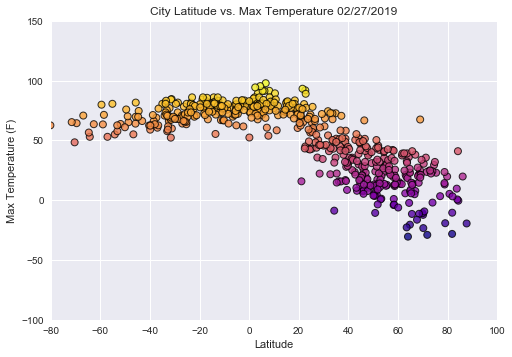

In [13]:
# Latitude vs. Temperature Plot 


plt.scatter(final_df["Latitude"], 
            final_df["Temp"], c=final_df["Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-100, 150])

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

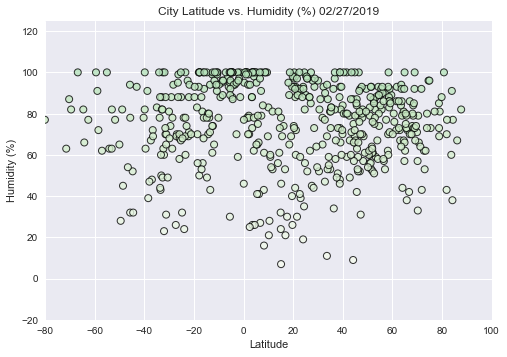

In [14]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(final_df["Latitude"], 
            final_df["Humidity"], c=final_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 125])

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

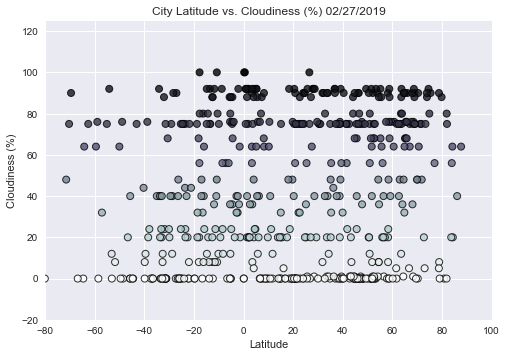

In [15]:
#Scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(final_df["Latitude"], 
            final_df["Cloud"], c=final_df["Cloud"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 125])

# Save the figure
plt.savefig("Latitude_Cloudiness.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

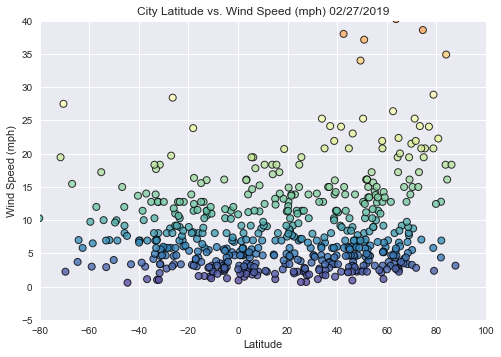

In [16]:
#Scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(final_df["Latitude"], 
            final_df["Wind"], c=final_df["Wind"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 40])

# Save the figure
plt.savefig("Latitude_WindSpeed.png")

# Show plot
plt.show()